In [1]:
import osmnx as ox
import geopandas as gpd
import pandas as pd

In [2]:
#place_name = 'Советский район, Новосибирск, Россия'
#district = ox.geometries.geometries_from_place(place_name, tags = {'building': True})

district = ox.geometries.geometries_from_point((54.86, 83.09), tags = {'building': True}, dist=2000)

In [3]:
from pyproj import Geod
from shapely.geometry import box

def distance_box(lon, lat, distance): # distance in meters
    g = Geod(ellps='clrk66') # geodesic calculation object
    
    #given latitude (lat), longitude (lon) values for the location
    top_right_corner = g.fwd(lon, lat, 45, distance)
    bottom_right_corner = g.fwd(lon, lat, 135, distance)
    bottom_left_corner = g.fwd(lon, lat, 225, distance)
    top_left_corner = g.fwd(lon, lat, 315, distance)
    
    max_lon = top_right_corner[0]
    max_lat = bottom_right_corner[1]
    min_lon = bottom_left_corner[0]
    min_lat = top_left_corner[1]
    
    return box(max_lon, max_lat, min_lon, min_lat)

In [4]:
from shapely.geometry import Point, LineString

def swap(x):
    def swap_xy_coords(coords):
        for x, y in coords:
            return (y, x)
    
    return type(x)(list(swap_xy_coords(x.coords)))




In [ ]:
from shapely import wkt
gdf = gpd.read_file('objects dataset.csv')
gdf['geometry'] = gdf['coordinate'].apply(wkt.loads)
gdf.geometry = gdf['geometry'].map(swap)
gdf.crs = "EPSG:4326"

gdf_sindex = gdf.sindex


In [ ]:
gdf.head()

,id,coordinate,commentary,object_name,tag,geometry
0,1,POINT (65.34920737750632 55.44483498578434),Тест теста,Детская площадка,baby,POINT (55.44483 65.34921)
1,3,POINT (68.349207378 58.444834986),new comment,Отдых (скамья),brench,POINT (58.44483 68.34921)
2,1,POINT (54.861004799753246 83.08279162642066),,Детская площадка,baby,POINT (83.08279 54.86100)
3,3,POINT (54.860927636572825 83.08214253183907),,Отдых (скамья),brench,POINT (83.08214 54.86093)
4,6,POINT (54.86046160801864 83.07903116938179),,Выгул собак,dog,POINT (83.07903 54.86046)


In [ ]:
box_query = distance_box(83.09, 54.86, 1500)
index = gdf_sindex.query(box_query)
academ_gdf = gdf.iloc[index]

In [ ]:
academ_gdf.head()

,id,coordinate,commentary,object_name,tag,geometry
92,13,POINT (54.858575191895014 83.07923287153244),,Прогулка,walk,POINT (83.07923 54.85858)
90,13,POINT (54.85860915703067 83.07798296213151),,Прогулка,walk,POINT (83.07798 54.85861)
91,13,POINT (54.85928536605016 83.07958155870439),,Прогулка,walk,POINT (83.07958 54.85929)
89,13,POINT (54.859371821180396 83.07801514863968),,Прогулка,walk,POINT (83.07802 54.85937)
4,6,POINT (54.86046160801864 83.07903116938179),,Выгул собак,dog,POINT (83.07903 54.86046)


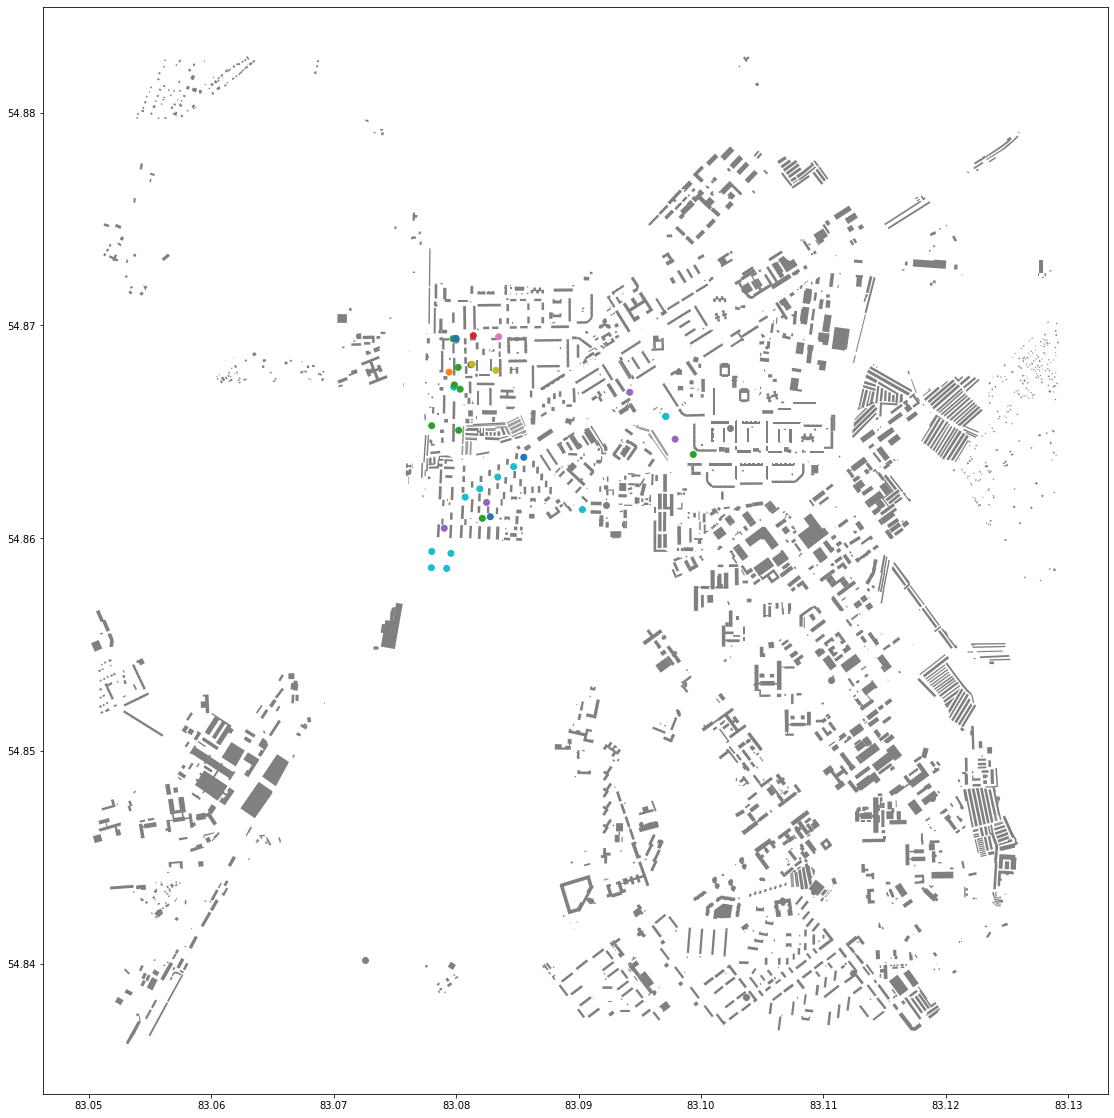

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(20, 20))
axes = district.plot(ax=axes, color='gray')
academ_gdf.plot(ax=axes, column = 'tag')
plt.show()

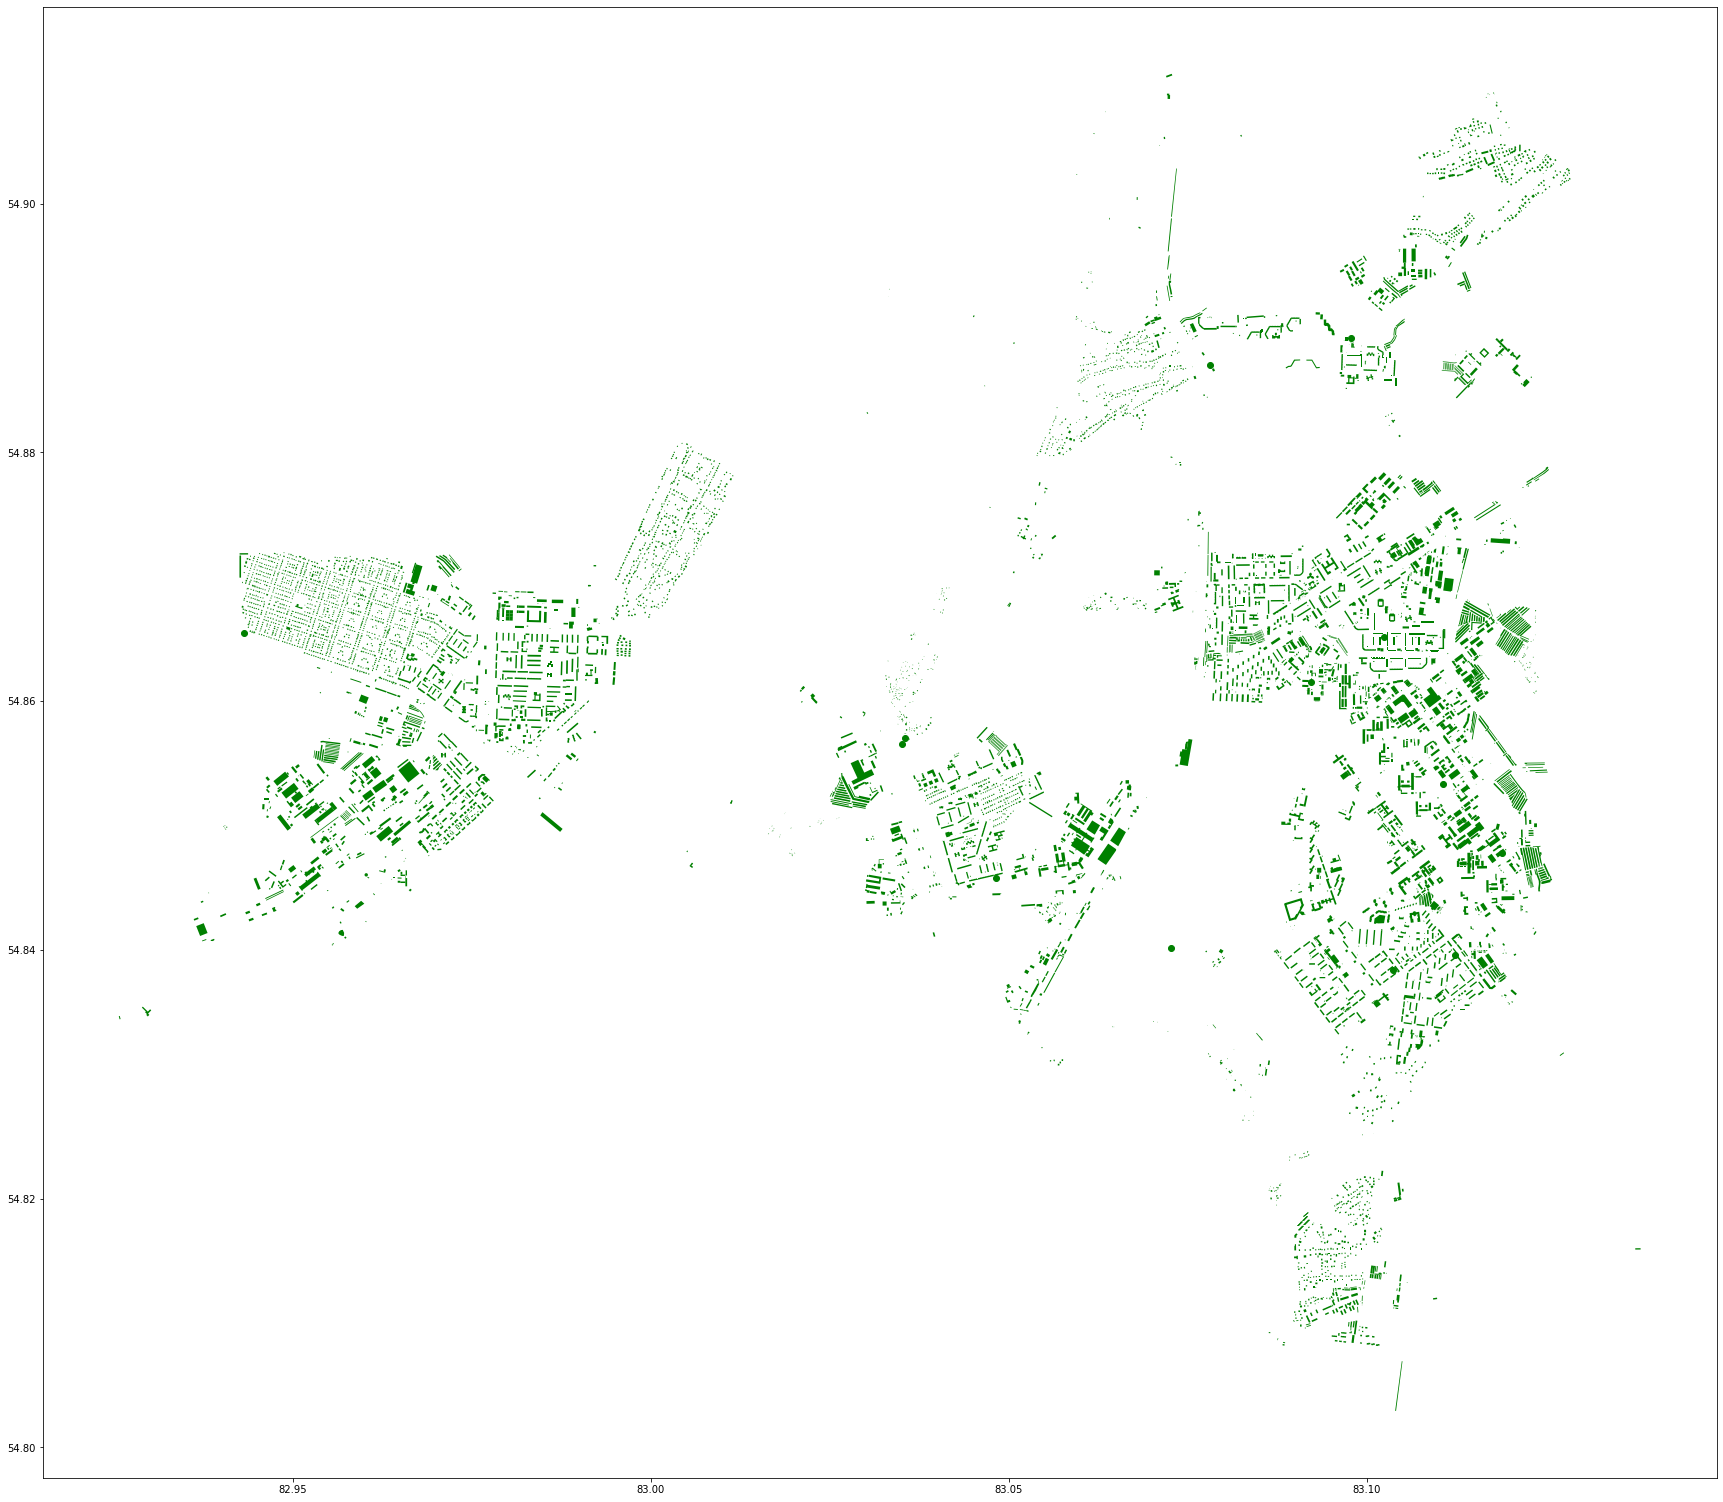

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(30, 30))
axes = district.plot(ax=axes, color='green')
plt.show()
